# ベーシックステップ
# 機械学習 PBL - 電力データを整理し現状を俯瞰する - サンプルコード
copyright 2019 DataMix Co.,Ltd.

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime as dt

#### `electric_power_data_2014.csv`を読み込みます
本ファイル(.ipynb)と electric_power_data_2014.csv の保存先に注意してください

In [3]:
dataset = pd.read_csv("electric_power_data_2014.csv")

In [4]:
dataset.head()

,time,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,...,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
0,2014-01-01 00:00:00,2.53807,24.004250,0.434405,148.88225,75.609750,276.04150,6.642168,247.47450,51.136375,...,100.285500,15475,1161.39275,1011.36375,17.275100,9.362220,237.48900,46.327225,724.70650,7351.3525
1,2014-01-01 01:00:00,2.85533,23.293000,0.000000,145.83325,71.036575,233.63075,5.935555,249.99975,52.010525,...,71.556025,14875,638.18550,909.09100,16.949175,11.410175,227.83125,48.414025,680.90175,7027.0250
2,2014-01-01 02:00:00,2.85533,24.537700,0.000000,142.27650,64.939000,212.79775,5.511587,251.68325,52.884650,...,68.522500,14850,573.83975,880.68175,17.926975,10.239923,199.73675,50.500825,664.40600,6689.1875
3,2014-01-01 03:00:00,2.85533,21.870575,0.000000,127.03250,64.634150,179.31550,5.935555,207.91225,46.765725,...,68.344050,14275,565.40075,857.95425,16.949175,10.239920,183.71350,46.327225,700.69650,6351.3525
4,2014-01-01 04:00:00,2.53807,22.226200,0.000000,111.28050,57.621950,156.25025,4.946298,191.07725,41.958025,...,68.879375,13400,558.01700,863.63600,17.601050,8.045650,186.12825,47.579325,678.51925,6837.8375


In [5]:
dataset.shape

(8760, 371)

#### カラム`"time"`をdatetime型に変換します

In [6]:
dataset["time"] = pd.to_datetime(dataset["time"])

#### データサイズが大きいので、サンプルコードでは分析に使うデータを`2014年1月分`のデータに絞ります
演習本番では適宜使用するデータ期間を変更してください

In [7]:
dataset_January = dataset[dataset["time"] < "2014-02-01"]

#### 集計を行いやすいようにデータの持ち方を変換します

In [8]:
data = pd.melt(dataset_January,
               id_vars=['time'], var_name="customer_id", value_name="power_usage")

In [9]:
data.head()

,time,customer_id,power_usage
0,2014-01-01 00:00:00,MT_001,2.53807
1,2014-01-01 01:00:00,MT_001,2.85533
2,2014-01-01 02:00:00,MT_001,2.85533
3,2014-01-01 03:00:00,MT_001,2.85533
4,2014-01-01 04:00:00,MT_001,2.53807


In [10]:
data.shape

(275280, 3)

#### サンプルコードでは`hour`の情報を使い集計していきます
カラム`time`から`hour`の情報をライブラリ`datetime`を用いて取り出します
その他の情報のサンプルコードは以下の通りです
```python
data["year"] = data["time"].dt.year
data["month"] = data["time"].dt.month
data["day"] = data["time"].dt.day
data["dayofweek"] = data["time"].dt.strftime('%A')
```

In [11]:
data["hour"] = data["time"].dt.hour

In [12]:
data.head()

,time,customer_id,power_usage,hour
0,2014-01-01 00:00:00,MT_001,2.53807,0
1,2014-01-01 01:00:00,MT_001,2.85533,1
2,2014-01-01 02:00:00,MT_001,2.85533,2
3,2014-01-01 03:00:00,MT_001,2.85533,3
4,2014-01-01 04:00:00,MT_001,2.53807,4


## 切り口を練るために可視化する

### ヒント1: Pandasによるデータの集計1: 集計関数を使う


### groupby + aggregateで集計する
使い方:  data.groupby([キーとなる列名]).aggregate({"集計対象の列名":集計関数}).reset_index()

In [13]:
total_power_usage_by_company = data.groupby(
    ["customer_id"]).aggregate({"power_usage": np.sum}).reset_index()
total_power_usage_by_company.head()

,customer_id,power_usage
0,MT_001,1805.204045
1,MT_002,21103.841510
2,MT_003,1253.475628
3,MT_004,104164.667950
4,MT_005,52476.836075


顧客ごとの1年間の総消費電力量をプロット

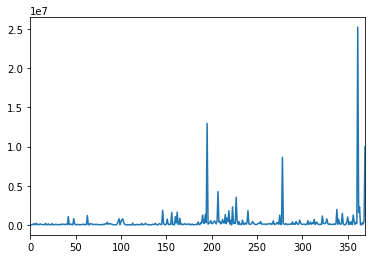

In [14]:
total_power_usage_by_company["power_usage"].plot(
    x="customer_id", y="power_usage")

### 時間別の消費電力量を集計する
ヒント:  data.groupby([キーとなる列名]).aggregate({"集計対象の列名":集計関数}).reset_index()

In [15]:
hourly_total_value = data.groupby(["hour"]).aggregate(
    {"power_usage": np.sum}).reset_index()

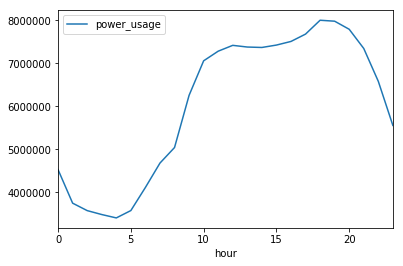

In [16]:
hourly_total_value.plot(x="hour", y="power_usage")

### ヒント2: Pandasによるデータの集計2: 要素数カウント

ヒント:  data.groupby([キーとなる列名]).aggregate({"集計対象の列名":集計関数}).reset_index()

In [17]:
data_non_zero = data[data["power_usage"] > 0]
hourly_total_count = data_non_zero.groupby(["hour"])["customer_id"].nunique()

In [18]:
hourly_total_count

hour
0     361
1     361
2     361
3     361
4     361
5     361
6     361
7     361
8     361
9     361
10    361
11    361
12    361
13    361
14    361
15    361
16    361
17    361
18    361
19    361
20    361
21    361
22    361
23    361
Name: customer_id, dtype: int64

### ヒント3: Pandasによるデータの集計3: pivot table

使い方:  pd.pivot_table(data, columns="横持ちする列", index="集計するキー", values="集計対象する列", aggfunc=集計関数).reset_index()

In [19]:
hour_df = pd.pivot_table(data, columns="hour",
                         index="customer_id", values="power_usage", aggfunc=np.mean).reset_index()

0時~23時の列を抽出する

In [20]:
target_cols = list(range(0,24))
hour_df2 = hour_df[target_cols]
hour_df2.head()

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,2.261750,2.394793,2.333389,2.271984,2.384559,2.374325,2.241282,2.312920,2.241283,3.090718,...,2.814395,3.049780,2.190112,1.842151,2.179877,2.261750,2.210579,2.353858,2.343623,2.251515
1,24.973622,23.229926,22.983285,22.323687,22.713703,22.530163,24.474600,30.153030,30.898692,30.984725,...,31.265777,29.327077,28.701876,28.810853,30.399677,32.361310,33.049606,30.806916,27.755475,26.631263
2,1.681568,1.905777,1.653542,1.625515,1.653542,1.737620,1.681568,1.681568,1.737620,1.744627,...,1.562457,1.562457,1.681568,1.730613,1.940809,1.709594,1.891764,1.681568,1.681568,1.681568
3,142.636992,119.427052,106.166485,102.625967,96.741452,94.594215,93.692682,106.625410,100.232838,107.740081,...,120.246591,125.065617,126.426094,145.095749,196.269323,241.689653,234.116855,217.184661,191.483089,168.076347
4,70.505509,63.778516,59.844604,62.214786,55.861522,57.798973,62.136113,63.935877,57.857985,60.454361,...,61.762386,66.197870,66.050356,73.052713,95.839944,105.920632,97.934756,92.319082,84.834790,80.910703


### 横軸に「時間」、縦軸に時間あたり消費電力量の平均の折れ線グラフ

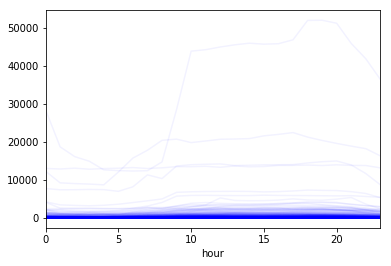

In [21]:
hour_df2.T.plot(color='blue', alpha=0.05, legend=False)

大口顧客と小口顧客が混ざっているので見にくいですね。

## ヒント4: 平均0, 標準偏差1で標準化

### StandardScalerで平均0、標準偏差1で標準化する

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler = StandardScaler()

In [24]:
hour_df2_std = scaler.fit_transform(hour_df2.T)
hour_df2_std

array([[-0.51814726, -0.95312885, -0.02892984, ...,  0.08409679,
        -0.39218999, -1.0937625 ],
       [-0.09933586, -1.44313067,  1.99089923, ..., -0.36603948,
        -0.93531785, -1.53128458],
       [-0.29263349, -1.51244012, -0.28140848, ..., -1.12172006,
        -0.97943708, -0.91775985],
       ...,
       [-0.22819841,  0.68610468, -0.02892984, ...,  0.89422159,
         0.42467606,  1.15088511],
       [-0.26041658, -0.17139098, -0.02892984, ...,  0.5535704 ,
         0.37491992,  1.06535207],
       [-0.55036315, -0.48730958, -0.02892984, ...,  0.14151647,
         0.29312046, -0.70830281]])

In [25]:
hour_df_std = pd.DataFrame(hour_df2_std).T
hour_df_std.columns = list(range(0, 24))
hour_df_std.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,-0.518147,-0.099336,-0.292633,-0.485930,-0.131553,-0.163768,-0.582579,-0.357066,-0.582575,2.091377,...,1.221536,1.962506,-0.743658,-1.839010,-0.775876,-0.518147,-0.679228,-0.228198,-0.260417,-0.550363
1,-0.953129,-1.443131,-1.512440,-1.697796,-1.588196,-1.639773,-1.093361,0.502354,0.711895,0.736071,...,0.815051,0.270250,0.094560,0.125184,0.571665,1.122910,1.316331,0.686105,-0.171391,-0.487310
2,-0.028930,1.990899,-0.281408,-0.533887,-0.281408,0.476027,-0.028930,-0.028930,0.476027,0.539147,...,-1.101964,-1.101964,-0.028930,0.412908,2.306498,0.223549,1.864660,-0.028930,-0.028930,-0.028930
3,0.060092,-0.470083,-0.772989,-0.853864,-0.988282,-1.037330,-1.057924,-0.762506,-0.908529,-0.737044,...,-0.451363,-0.341284,-0.310207,0.116257,1.285195,2.322715,2.149732,1.762957,1.175865,0.641194
4,-0.001978,-0.479428,-0.758638,-0.590414,-1.041339,-0.903828,-0.595998,-0.468259,-0.899639,-0.715361,...,-0.622523,-0.307714,-0.318184,0.178810,1.796139,2.511618,1.944819,1.546245,1.015046,0.736533


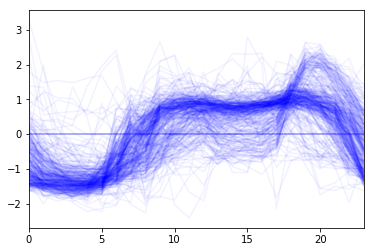

In [26]:
hour_df_std.T.plot(color='blue', alpha=0.05, legend=False)

## ヒント5:  クラスタリング

In [28]:
from sklearn.cluster import KMeans

ElbowMethodで最適なクラスター数をみてみましょう

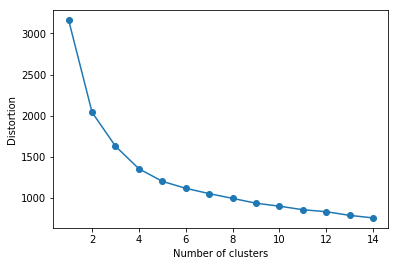

In [29]:
distortions = []

for i in range(1, 15):
    km = KMeans(n_clusters=i, random_state=1234)
    km.fit(hour_df_std)
    distortions.append(km.inertia_)

plt.plot(range(1, 15), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

今回はクラスター数：2として、試しにやってみましょう。

In [30]:
km = KMeans(n_clusters=2, random_state=1234)

In [31]:
km.fit(hour_df_std)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=1234, tol=0.0001, verbose=0)

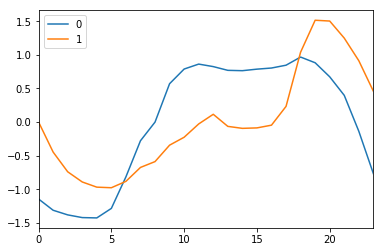

In [32]:
pd.DataFrame(km.cluster_centers_).T.plot()

In [33]:
cluster_labels = km.predict(hour_df_std)
np.bincount(cluster_labels)

array([259, 111], dtype=int64)

In [34]:
hour_df_std["cluster_labels"] = cluster_labels

In [35]:
hour_df_std.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,cluster_labels
0,-0.518147,-0.099336,-0.292633,-0.485930,-0.131553,-0.163768,-0.582579,-0.357066,-0.582575,2.091377,...,1.962506,-0.743658,-1.839010,-0.775876,-0.518147,-0.679228,-0.228198,-0.260417,-0.550363,0
1,-0.953129,-1.443131,-1.512440,-1.697796,-1.588196,-1.639773,-1.093361,0.502354,0.711895,0.736071,...,0.270250,0.094560,0.125184,0.571665,1.122910,1.316331,0.686105,-0.171391,-0.487310,0
2,-0.028930,1.990899,-0.281408,-0.533887,-0.281408,0.476027,-0.028930,-0.028930,0.476027,0.539147,...,-1.101964,-0.028930,0.412908,2.306498,0.223549,1.864660,-0.028930,-0.028930,-0.028930,1
3,0.060092,-0.470083,-0.772989,-0.853864,-0.988282,-1.037330,-1.057924,-0.762506,-0.908529,-0.737044,...,-0.341284,-0.310207,0.116257,1.285195,2.322715,2.149732,1.762957,1.175865,0.641194,1
4,-0.001978,-0.479428,-0.758638,-0.590414,-1.041339,-0.903828,-0.595998,-0.468259,-0.899639,-0.715361,...,-0.307714,-0.318184,0.178810,1.796139,2.511618,1.944819,1.546245,1.015046,0.736533,1


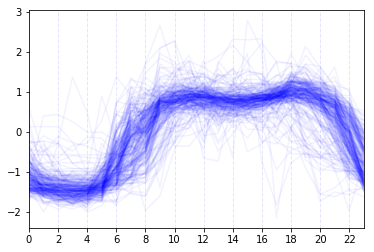

In [36]:
ax = hour_df_std[hour_df_std["cluster_labels"] == 0][list(
    range(0, 24))].T.plot(color='blue', alpha=0.05, legend=False)
ax.set_xticks(list(range(0, 24, 2)))
ax.grid(which="major", axis="x", color="blue",
        alpha=0.1, linestyle="--", linewidth=1)

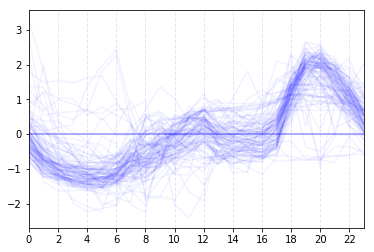

In [38]:
ax = hour_df_std[hour_df_std["cluster_labels"] == 1][list(
    range(0, 24))].T.plot(color='blue', alpha=0.05, legend=False)
ax.set_xticks(list(range(0, 24, 2)))
ax.grid(which="major", axis="x", color="blue",
        alpha=0.1, linestyle="--", linewidth=1)

In [39]:
agg_df = hour_df.copy()

In [40]:
agg_df["cluster_labels"] = cluster_labels

In [41]:
agg_pt = agg_df.groupby(["cluster_labels"]).aggregate(
    {"customer_id": "nunique"})

In [42]:
agg_pt

,customer_id
cluster_labels,
0,259
1,111


## クラスタリングのパターン
- クラスター0：グラフからは9時〜20時の日中から夜までよく電力を使う顧客, 顧客数259
- クラスター1：グラフからは18時〜22時の夜によく電力を使う顧客, 顧客数111